In [1]:
# QUESTION 1

In [2]:
# step 1: loading the file

In [3]:
# imports 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# load the dataset
df = pd.read_excel("../data/Question1_Analysis.xlsx")

# checking if it is loaded correctly
print("Date dtype:", df['date'].dtype)
print("Platforms:", df['platform'].unique())
print("Channels:", df['channel'].unique())

Date dtype: datetime64[ns]
Platforms: ['iOS' 'Android']
Channels: ['Social' 'Search' 'Email' 'Referral']


In [5]:
# step 2: derived metrics

In [6]:
# avoid division by zero
df['arpu'] = (df['revenue'] / df['new_installs']).where(df['new_installs'] != 0, 0)

# roas: return on ad spend (previously labeled as roi)
df['roas'] = (df['revenue'] / df['ad_cost']).where(df['ad_cost'] != 0, 0)

# correct roi: (revenue - ad_cost) / ad_cost
df['roi'] = ((df['revenue'] - df['ad_cost']) / df['ad_cost']).where(df['ad_cost'] != 0, 0)

# customer acquisition cost
df['cac'] = (df['ad_cost'] / df['new_installs']).where(df['new_installs'] != 0, 0)

# display the corrected values for a specific date
df[df['date'] == '2023-01-01'][['date', 'platform', 'channel', 'arpu', 'roas', 'roi', 'cac']]

,date,platform,channel,arpu,roas,roi,cac
0,2023-01-01,iOS,Social,0.445378,1.274019,0.274019,0.349585
1,2023-01-01,iOS,Search,0.575758,1.434110,0.434110,0.401474
2,2023-01-01,iOS,Email,0.588235,1.645755,0.645755,0.357426
3,2023-01-01,iOS,Referral,0.462366,0.000000,0.000000,0.000000
4,2023-01-01,Android,Social,0.257576,0.675613,-0.324387,0.381248
5,2023-01-01,Android,Search,0.243750,0.589071,-0.410929,0.413787
6,2023-01-01,Android,Email,0.263158,0.720239,-0.279761,0.365376
7,2023-01-01,Android,Referral,0.345455,0.000000,0.000000,0.000000


In [7]:
# we want to find:
# which platform has the higher ARPU? (average revenue per user)
# which channel has the highest ROAS? (return on ad spend)
# which channel has the highest ROI? (actual return: (revenue - cost) / cost)
# which channel has the lowest CAC? (customer acquisition cost)

# calculate correct ROI and ROAS if not already in the dataframe
df['roas'] = (df['revenue'] / df['ad_cost']).where(df['ad_cost'] != 0, 0)
df['roi'] = ((df['revenue'] - df['ad_cost']) / df['ad_cost']).where(df['ad_cost'] != 0, 0)

# average ARPU by platform
avg_arpu = df.groupby('platform')['arpu'].mean()

# average ROAS by channel
avg_roas = df.groupby('channel')['roas'].mean()

# average ROI by channel
avg_roi = df.groupby('channel')['roi'].mean()

# average CAC by channel
avg_cac = df.groupby('channel')['cac'].mean()

# display results
print("Average ARPU by platform:\n", avg_arpu)
print("\nAverage ROAS by channel:\n", avg_roas)
print("\nAverage ROI by channel:\n", avg_roi)
print("\nAverage CAC by channel:\n", avg_cac)


Average ARPU by platform:
 platform
Android    0.281007
iOS        0.532116
Name: arpu, dtype: float64

Average ROAS by channel:
 channel
Email       1.498145
Referral    0.000000
Search      1.593810
Social      1.620806
Name: roas, dtype: float64

Average ROI by channel:
 channel
Email       0.498145
Referral    0.000000
Search      0.593810
Social      0.620806
Name: roi, dtype: float64

Average CAC by channel:
 channel
Email       0.284877
Referral    0.000000
Search      0.269814
Social      0.262474
Name: cac, dtype: float64


In [8]:
# insights: derived metrics (ARPU, ROAS, ROI, CAC)

# which platform has the higher ARPU? -> iOS with 0.532116
# this shows that iOS users generate more revenue per install compared to Android (0.281007)

# which channel has the highest ROAS? -> Social with 1.620806
# which channel has the highest ROI? -> Social with 0.620806
# which channel has the lowest CAC? -> Social with 0.262474
# social is both the most profitable (high ROI) and the cheapest (low CAC)

# search and email also show strong performance, but social is slightly ahead on all metrics
# email has the second-highest ROI (0.498145), indicating it brings in solid long-term value

# referral's ROAS, ROI, and CAC are all zero → because ad cost is always zero
# this suggests referral traffic is unpaid (organic), and these cost-based metrics aren't meaningful
# it's still generating some installs and revenue, but should be analyzed separately

In [9]:
# step 3: time-series trend

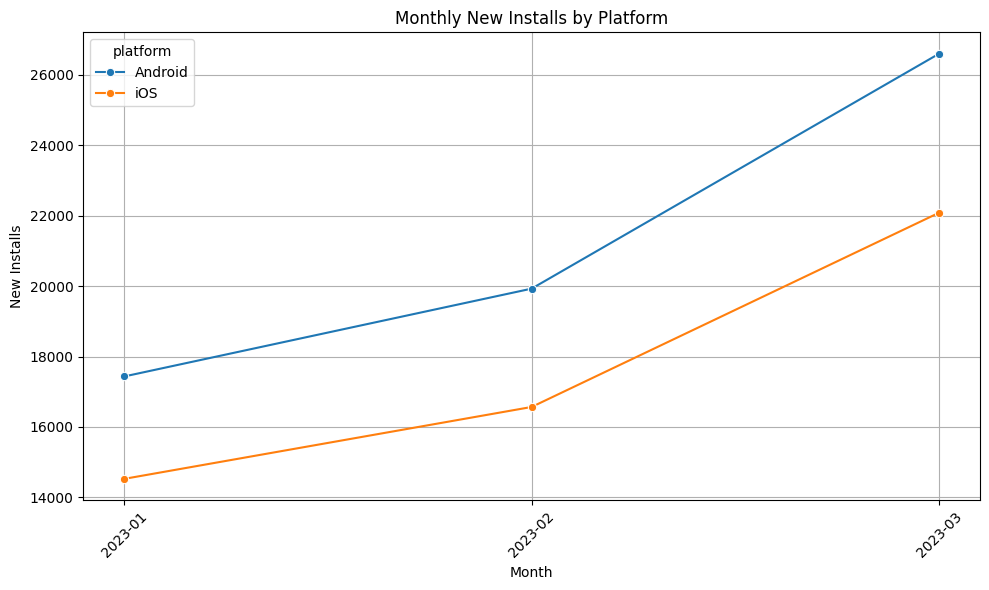

In [10]:
# make sure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# extract the month (e.g. 2024-01, 2024-02...)
df['month'] = df['date'].dt.to_period('M').astype(str)

# group total installs by month and platform
monthly_installs = df.groupby(['month', 'platform'])['new_installs'].sum().reset_index()

# plot the line chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_installs, x='month', y='new_installs', hue='platform', marker='o')

plt.title('Monthly New Installs by Platform')
plt.xlabel('Month')
plt.ylabel('New Installs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [11]:
# insights: monthly time-series trend
# the chart shows total installs by platform for each month (jan–mar 2023)
# both platforms are growing, but android has higher overall volume
# android grew steadily each month, with a big jump in march
# ios also grew each month, but slightly behind android in total installs
# even though android has more installs, we previously saw that ios has higher ARPU
# this means ios users are more valuable, so both volume and quality should be considered together

In [12]:
# step 4: visualization - ROI grouped bar chart

In [13]:
# convert date column and extract month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)

# group by month and channel, calculate average ROI and ROAS
monthly_metrics = df.groupby(['month', 'channel'])[['roi', 'roas']].mean().reset_index()

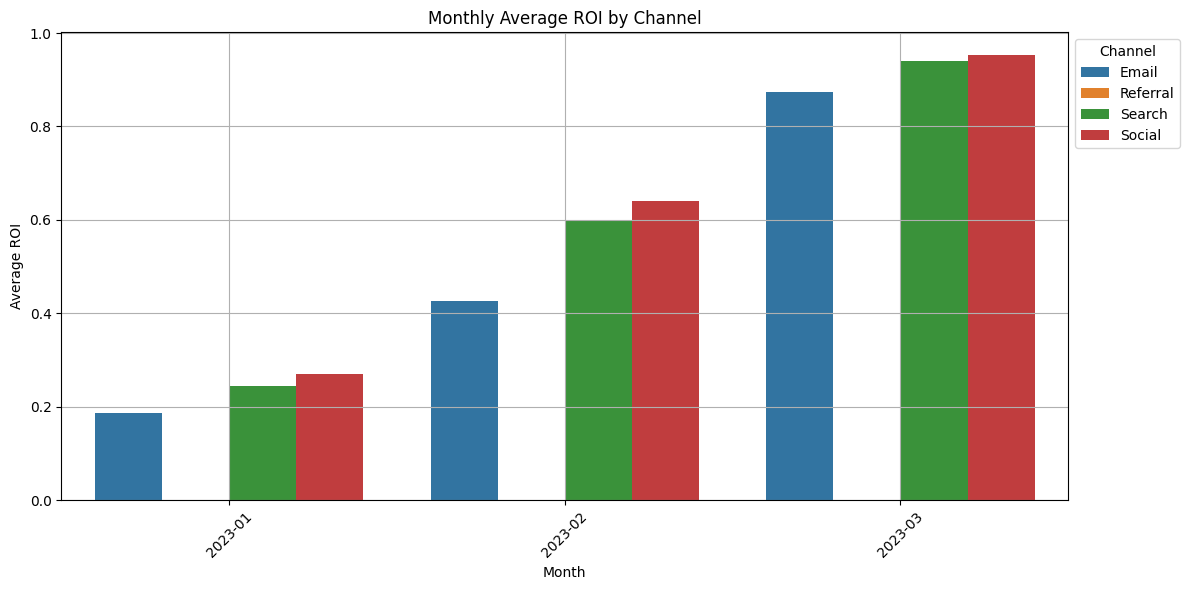

In [14]:
plt.figure(figsize=(12, 6))

# draw the barplot for ROI
sns.barplot(
    data=monthly_metrics,
    x='month',
    y='roi',
    hue='channel'
)

plt.title("Monthly Average ROI by Channel")
plt.xlabel("Month")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Channel', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


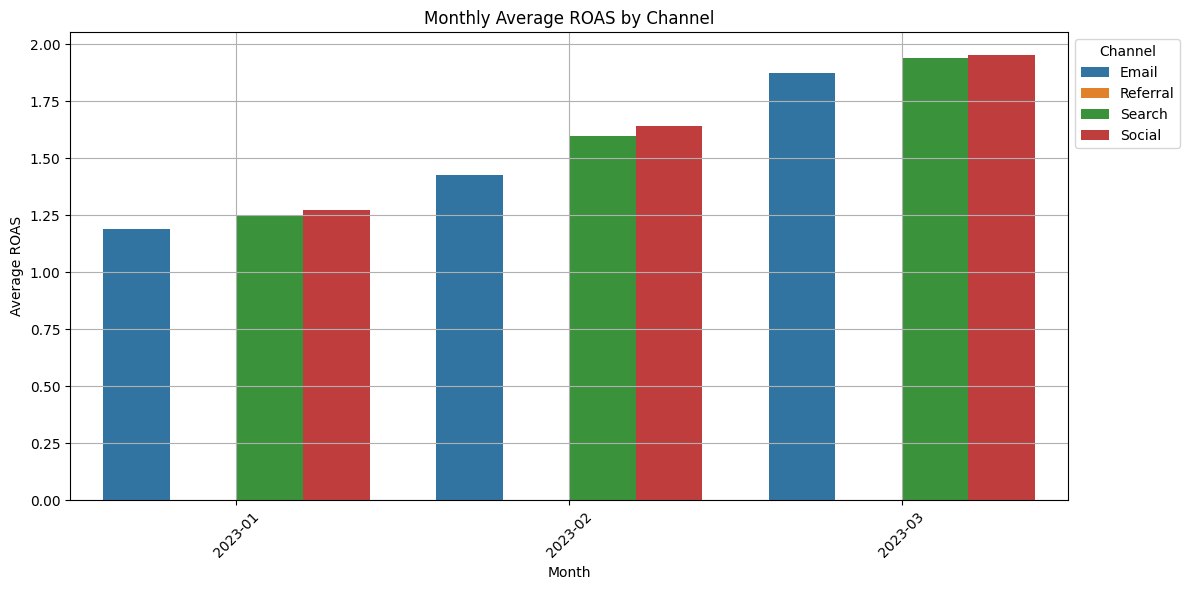

In [15]:
plt.figure(figsize=(12, 6))

# draw the barplot for ROAS
sns.barplot(
    data=monthly_metrics,
    x='month',
    y='roas',
    hue='channel'
)

plt.title("Monthly Average ROAS by Channel")
plt.xlabel("Month")
plt.ylabel("Average ROAS")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Channel', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [16]:
# insights: monthly roi and roas by channel

# all three paid channels (email, search, social) show clear, steady growth in both roi and roas from january to march
# by march, all three reach high performance levels:
# roi around 0.9–1.0 → meaning close to or double the return on ad spend
# roas around 1.9–2.0 → indicating each $1 spent returns nearly $2 in revenue

# email started lower in january but showed strong month-over-month improvement
# by march, email matches or slightly exceeds the roi/roas of social and search, suggesting it scaled well

# referral is excluded due to zero ad cost, which makes roi and roas calculations invalid
# it may still contribute organically, but not in a way that can be evaluated with cost-based metrics

# no anomalies or drops observed — the consistent upward trend across all channels suggests effective campaign scaling and optimization

# overall, social and search remain strong and stable, and email becomes increasingly competitive over time

In [17]:
## Final Interpretation & Recommendations

# Key Patterns and Differences:

# - iOS vs Android: iOS has a much higher ARPU, meaning each user brings in more revenue on average. However, Android consistently brings 
# in more new installs each month. So while Android scales better in volume, iOS users are more valuable in terms of monetization.

# - Channel Performance: Social and Search channels consistently had the highest ROI and lowest CAC, making them the most cost-effective. 
# Email started off slightly lower but caught up by March. All paid channels showed smooth ROI growth with no major dips, which indicates 
# healthy scaling.

# - Referral Anomaly: Referral had 0 ad cost across the dataset. Since it brought in installs and revenue without spend, it's likely 
# organic traffic. Its ROI and CAC aren't meaningful and should be analyzed separately from paid campaigns.

# Possible Causes:
# - iOS users may have higher purchasing power or be more likely to convert.
# - Social and Search likely benefit from stronger targeting and engagement algorithms.
# - Email may respond well to scaling once optimized properly.

# Recommendations to Marketing Team:

# - Focus on scaling Social and Search, especially on Android where volume is higher and cost is low.
# - Run value focused campaigns on iOS, targeting fewer users but with high ARPU potential.
# - Gradually increase Email budget, especially since it showed positive ROI growth.
# - Exclude Referral from paid performance reports or evaluate it separately as an organic source.

# The overall acquisition strategy looks healthy. The next step could involve optimizing creative-level performance or testing targeting 
# strategies by channel and platform.

In [18]:
# QUESTION 2

In [19]:
# Experiment: Scaling a High-ROI, Low-Volume Channel (Email)

# If Email has a high ROI but low install volume, the key question is whether that efficiency holds at a larger scale.
# Simply spending more money can increase cost hence decrease the ROI
# That's why we need to see the effects of the increased ad_cost

# We can run a test for a fixed amount of time, in this case let's fix it as 3 weeks

# We will have a base group (which will be the standard for our experiment)
# And we will have a test group (which will receive a higher budget)

# Success Metrics
# Our 1st success metric is ROI increase/decrease. We will compare base group's and test group's ROI. -> did the increased spend increased 
# ROI from this chanel

# Our 2nd success metric is "Absolute Install Growth" -> did the increased spend lead to a statistically significant increase in new 
# installs from this channel?

# Guard-rails
# 1st guard-rail: We will set a breakpoint ROI. If the ROI gets below this breakpoint, we stop the experiment in order to prevent loss.
# 2nd guard-rail: We will also monitor CAC alongside the ROI.

In [20]:
# Two Additional Raw Metrics

# Current dataset is good for understanding how cost-effectively we gain users. But it tells us nothing about after the install
# Are these high-ROI users sticking around? Are they actually the ones spending money?

# Metric 1: User Retention Rate (Day 1, Day 7, Day 30)
# Project Idea:
# I would group users into cohorts based on where and when they came from (like “January - iOS - Search” or “January - Android - Social”), 
# and track how many of them are still active 1, 7, and 30 days after installing the app.

# Why It Matters:
# This would show the real quality of users from each channel. For example, Social might bring in a lot of users with great Day 1 ROI, 
# but if they never return, the channel isn’t actually valuable long term. On the other hand, Email might bring fewer users, but if they 
# stick around, their lifetime value (LTV) is much higher. This helps shift budget away from “cheap” users and toward users who are 
# actually worth more over time.

# Metric 2: Funnel Conversion by Ad Type

# Project Idea:
# I would map the key steps a user takes before making a purchase 
# (like: Open App → View Product → Add to Cart → Start Checkout → Complete Purchase). 
# Then I’d track which ads or campaigns are bringing in users who actually move through this funnel.

# Why It Matters:
# This helps identify which ads are driving real, valuable behavior. For example, maybe a video ad brings lots of installs, but those 
# users never buy anything. Meanwhile, a static image ad might bring fewer users, but they’re more likely to complete a purchase. This 
# kind of insight helps the team stop spending on low-quality ads and double down on the ones that actually generate revenue — which in 
# turn increases ARPU.

In [21]:
# Sudden Drop in iOS Revenue Investigation
# If iOS installs remain steady but revenue drops sharply, it likely indicates an issue occurring after installation
# I would approach the investigation in three stages.

# Here is how I would break down the investigation, starting with the most likely causes:

# 1 - Technical Issues:
# App Version & Crashes: 
# First, I would compare the drop date with recent iOS app version releases. 
# Then, I would review crash rates and check for app freezes and see if a bug is preventing/disrupting the purchases.

# In-App Purchase Settings:  
# I’d review the App Store: Are product IDs still live? Are prices right? Any errors in payment processing logs?
# A misconfiguration could instantly block all payments.

# 2 - User Behavior & Funnel Drop-Off:
# Funnel Analysis: 
# I would analyze each step of the in-app purchase funnel (e.g., impression → view item → add to cart → checkout → purchase).
# A sharp drop at a specific stage could indicate where users are getting stuck — for example, if many users initiate checkout but 
# few complete it, that might suggest a payment UI bug.

# User Segmentation:
# I would break down the data by region, device model, iOS version, and other dimensions to see if the issue is concentrated in a 
# specific user group (e.g., only users in a certain country or on a certain device are affected).

# 3 - External Factors
# Competitor Activity:
# I would check for major competitor promotions, product launches, or discounts that might have shifted user attention or spending 
# temporarily.

# App Store or Platform Issues:
# Finally, I would check official Apple status pages, developer forums, and industry news sources to rule out platform-side outages 
# or bugs in payment systems.

In [22]:
# QUESTION 3

```sql
-- Step 1: SQL Feature Extraction:

SELECT 
  campaign_id, 
  channel, 
  impressions, 
  clicks, 
  conversions, 
  spend, 
  revenue,

  -- Click-through rate: percentage of impressions that turn into clicks
  (clicks * 1.0) / impressions AS ctr,

  -- Conversion rate: percentage of clicks that lead to conversions
  (conversions * 1.0) / clicks AS conversion_rate,

  -- Return on investment
  ((revenue - spend) * 1.0) / spend AS roi,

  -- Binary label: 1 if profitable, 0 if not
  CASE 
    WHEN revenue > spend THEN TRUE 
    ELSE FALSE 
  END AS is_profitable

FROM Question3_CampaignData;
```


In [23]:
# Step 2: Model Building in Python

In [38]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [39]:
# load the dataset
df = pd.read_csv("Question3_CampaignData.csv")

# display the first few rows to inspect
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Question3_CampaignData.csv'